<a href="https://colab.research.google.com/github/vcfq/Competencia-y-Regulaci-n/blob/main/Tarea_Emp%C3%ADrica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1

Bases
------

In [1]:
import pandas as pd

url_base1 = 'https://github.com/vcfq/Competencia-y-Regulaci-n/raw/refs/heads/main/base1.xlsx'
url_base2 = 'https://github.com/vcfq/Competencia-y-Regulaci-n/raw/refs/heads/main/base2.xlsx'

df_1 = pd.read_excel(url_base1)
df_2 = pd.read_excel(url_base2)

Estadísticas descriptivas
-----

**Prestadores en el tiempo**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

#merge de bases
df = df_1.merge(df_2, on="ciudad")
df["poblacion_total"] = df["poblacion_inicial"] * (1 + df["crecimiento_anual"]) ** (df["year"] - 2001)
df["porcentaje_operados"] = df["num_operados"] / df["poblacion_total"]
df

,ciudad,year,prestador,num_operados,tecnologia_alta,infraestructura,puntaje_doctor,precio,poblacion_inicial,crecimiento_anual,poblacion_total,porcentaje_operados
0,1,2001,Clinica_B,2521.478838,0,6.993077,6.820721,9.458984,228037,0.056576,228037.000000,0.011057
1,1,2001,Clinica_A,3327.113736,0,8.313865,8.516229,10.584837,228037,0.056576,228037.000000,0.014590
2,1,2001,Clinica_C,2569.037947,0,5.452967,6.444618,9.180535,228037,0.056576,228037.000000,0.011266
3,1,2001,Publico,2512.660532,0,5.367397,8.169181,10.166758,228037,0.056576,228037.000000,0.011019
4,1,2002,Clinica_A,6000.304696,0,8.743796,8.838369,10.384828,228037,0.056576,240938.509024,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...
672,20,2009,Publico,2138.036168,0,5.747862,7.807999,10.397965,394103,0.031370,504573.441537,0.004237
673,20,2009,Clinica_A,26625.029037,1,7.966443,8.677398,11.878463,394103,0.031370,504573.441537,0.052767
674,20,2010,Clinica_C,6184.974853,0,6.356885,5.956945,8.429723,394103,0.031370,520401.714037,0.011885
675,20,2010,Publico,5521.168999,0,5.660949,7.658171,9.344286,394103,0.031370,520401.714037,0.010609


**Tablas de estadísticas**

In [3]:
#resumen de estadisticas
estadisticas = df.groupby("prestador").describe().round(2)
estadisticas.columns = ['_'.join(col).strip() for col in estadisticas.columns]
estadisticas.reset_index(inplace=True)

estadisticas_ciudad = df.groupby("ciudad").describe().round(2)
estadisticas_ciudad.columns = ['_'.join(col).strip() for col in estadisticas_ciudad.columns]
estadisticas_ciudad.reset_index(inplace=True)

media_ciudad = df.groupby("ciudad").mean(numeric_only=True).round(2).reset_index()

latex_ciudad = media_ciudad.to_latex(index=False, caption="Media por ciudad", label="tab:media_ciudad")
with open("media_ciudad.tex", "w") as f:
    f.write(latex_ciudad)
files.download("media_ciudad.tex")

moda_ciudad = df.groupby('prestador')['ciudad'].agg(lambda x: x.mode().iloc[0]).reset_index()
moda_ciudad.columns = ['prestador', 'ciudad_moda']

latex_moda = moda_ciudad.to_latex(index=False, caption="Ciudad más frecuente por prestador", label="tab:moda_ciudad")
with open("moda_ciudad.tex", "w") as f:
    f.write(latex_moda)
files.download("moda_ciudad.tex")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
moda_prestador = df.groupby('ciudad')['prestador'].agg(lambda x: x.mode().iloc[0]).reset_index()
moda_prestador.columns = ['ciudad', 'prestador_moda']

# Exportar a LaTeX
latex_moda_prestador = moda_prestador.to_latex(index=False, caption="Prestador más frecuente por ciudad", label="tab:moda_prestador_ciudad")
with open("moda_prestador_ciudad.tex", "w") as f:
    f.write(latex_moda_prestador)
files.download("moda_prestador_ciudad.tex")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
promedio_por_anio = df.groupby("year")["porcentaje_operados"].mean().reset_index()
promedio_por_anio.columns = ["año", "porcentaje_operados_promedio"]
promedio_por_anio["porcentaje_operados_promedio"] = (promedio_por_anio["porcentaje_operados_promedio"] * 100).round(2)

# Exportar a LaTeX
latex_promedio = promedio_por_anio.to_latex(index=False, caption="Porcentaje promedio de operados por año", label="tab:promedio_operados_anio")
with open("porcentaje_promedio_operados_anio.tex", "w") as f:
    f.write(latex_promedio)
files.download("porcentaje_promedio_operados_anio.tex")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
#resumen detallado utilizado en la tabla 1
resumen = df.groupby("prestador").agg(
    precio_media=("precio", "mean"),
    precio_sd=("precio", "std"),
    precio_min=("precio", "min"),
    precio_max=("precio", "max"),
    infra_media=("infraestructura", "mean"),
    infra_sd=("infraestructura", "std"),
    infra_min=("infraestructura", "min"),
    infra_max=("infraestructura", "max"),
    ptje_media=("puntaje_doctor", "mean"),
    ptje_sd=("puntaje_doctor", "std"),
    ptje_min=("puntaje_doctor", "min"),
    ptje_max=("puntaje_doctor", "max"),
    tecnologia_media=("tecnologia_alta", "mean"),
    operados_total=("num_operados", "sum")
).round(2).reset_index()

tabla_1 = resumen[["prestador", "precio_media", "precio_sd", "precio_min", "precio_max",
                   "infra_media", "infra_sd", "infra_min", "infra_max"]]
tabla_2 = resumen[["prestador", "ptje_media", "ptje_sd", "ptje_min", "ptje_max",
                   "tecnologia_media", "operados_total"]]

tabla_1.columns = ["Prestador", "Precio Media", "Precio SD", "Precio Min", "Precio Max",
                   "Infra Media", "Infra SD", "Infra Min", "Infra Max"]
tabla_2.columns = ["Prestador", "Puntaje Media", "Puntaje SD", "Puntaje Min", "Puntaje Max",
                   "Tecnología", "Operados"]

latex_tabla1 = tabla_1.to_latex(index=False, caption="Estadísticas descriptivas por prestador", label="tab:resumen_prestadores")
latex_tabla2 = tabla_2.to_latex(index=False, caption="Estadísticas descriptivas complementarias", label="tab:resumen_prestadores_complemento")

with open("resumen_prestadores_1.tex", "w") as f1:
    f1.write(latex_tabla1)
files.download("resumen_prestadores_1.tex")
with open("resumen_prestadores_2.tex", "w") as f2:
    f2.write(latex_tabla2)
files.download("resumen_prestadores_2.tex")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
#resumen por ciudad
stats_ciudad = df.groupby("ciudad").agg(
    poblacion_promedio=("poblacion_total", "mean"),
    porcentaje_operados_prom=("porcentaje_operados", "mean"),
    precio_promedio=("precio", "mean"),
    infra_promedio=("infraestructura", "mean"),
    puntaje_promedio=("puntaje_doctor", "mean"),
    tecnologia_prom=("tecnologia_alta", "mean"),
    total_operados=("num_operados", "sum")
).round(2).reset_index()

latex_ciudad = stats_ciudad.to_latex(index=False, caption="Estadísticas descriptivas por ciudad", label="tab:estadisticas_ciudad")
with open("estadisticas_ciudad.tex", "w") as f:
    f.write(latex_ciudad)
files.download("estadisticas_ciudad.tex")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
#resumen por año
stats_anio = df.groupby("year").agg(
    poblacion_total=("poblacion_total", "sum"),
    porcentaje_operados_prom=("porcentaje_operados", "mean"),
    precio_promedio=("precio", "mean"),
    infra_promedio=("infraestructura", "mean"),
    puntaje_promedio=("puntaje_doctor", "mean"),
    tecnologia_prom=("tecnologia_alta", "mean"),
    total_operados=("num_operados", "sum")
).round(2).reset_index()

latex_anio = stats_anio.to_latex(index=False, caption="Estadísticas descriptivas por año", label="tab:estadisticas_anio")
with open("estadisticas_anio.tex", "w") as f:
    f.write(latex_anio)
files.download("estadisticas_anio.tex")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Gráficos estadísticas**

In [9]:
#precio
plt.figure(figsize=(8, 5))
sns.histplot(df, x="precio", hue="prestador", kde=True)
plt.title("Distribución de Precios por Prestador")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("grafico_precio.pdf")
plt.close()

#infraestructura
plt.figure(figsize=(8, 5))
sns.histplot(df, x="infraestructura", hue="prestador", kde=True)
plt.title("Distribución de Infraestructura por Prestador")
plt.xlabel("Infraestructura")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("grafico_infraestructura.pdf")
plt.close()

#puntaje de doctor
plt.figure(figsize=(8, 5))
sns.histplot(df, x="puntaje_doctor", hue="prestador", kde=True)
plt.title("Distribución de Puntaje del Doctor por Prestador")
plt.xlabel("Puntaje del Doctor")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("grafico_puntaje_doctor.pdf")
plt.close()

files.download("grafico_precio.pdf")
files.download("grafico_infraestructura.pdf")
files.download("grafico_puntaje_doctor.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Proporción operados**

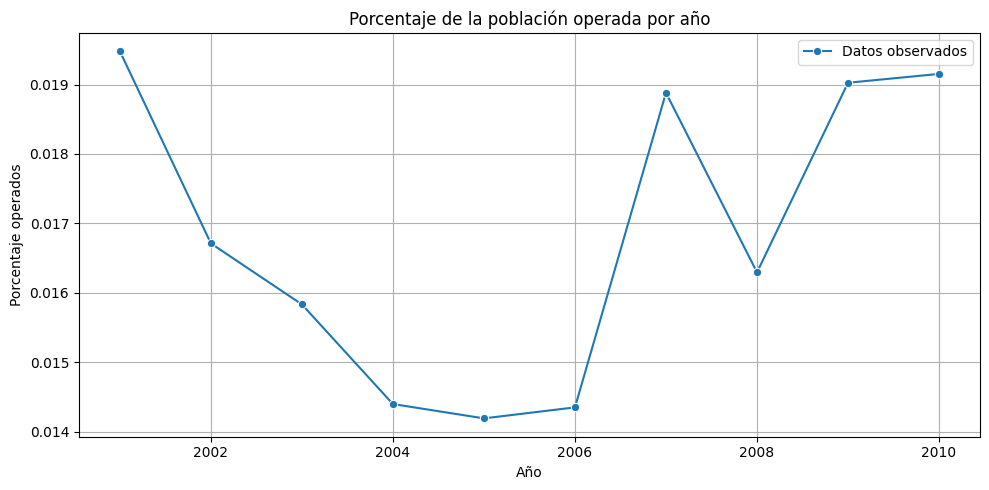

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
#evolución operaciones
evolucion = df.groupby("year").agg({
    "num_operados": "sum",
    "poblacion_total": "sum"
}).reset_index()
evolucion["porcentaje_operados"] = evolucion["num_operados"] / evolucion["poblacion_total"]

plt.figure(figsize=(10, 5))
sns.lineplot(data=evolucion, x="year", y="porcentaje_operados", marker="o", label="Datos observados")
plt.title("Porcentaje de la población operada por año")
plt.ylabel("Porcentaje operados")
plt.xlabel("Año")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("evolucion_operaciones.pdf", format="pdf")
plt.show()
files.download("evolucion_operaciones.pdf")

**Efecto de la introducción de la tecnología**

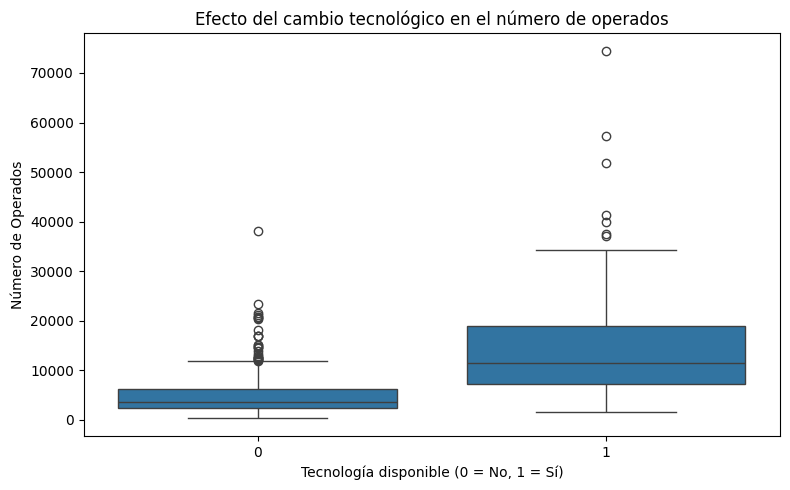

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="tecnologia_alta", y="num_operados", data=df)
plt.xlabel("Tecnología disponible (0 = No, 1 = Sí)")
plt.ylabel("Número de Operados")
plt.title("Efecto del cambio tecnológico en el número de operados")
plt.tight_layout()
plt.savefig("efecto_tecnologia_operados.pdf")
plt.show()
files.download("efecto_tecnologia_operados.pdf")

**Efecto tecnología en precios**

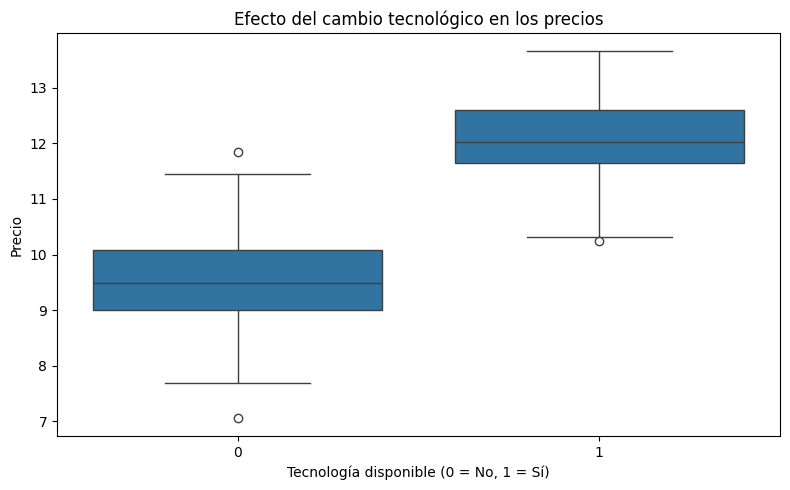

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="tecnologia_alta", y="precio", data=df)
plt.xlabel("Tecnología disponible (0 = No, 1 = Sí)")
plt.ylabel("Precio")
plt.title("Efecto del cambio tecnológico en los precios")
plt.tight_layout()
plt.savefig("efecto_tecnologia_precios.pdf")
plt.show()
files.download("efecto_tecnologia_precios.pdf")

**Prestadores similares**

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#metodo: k-means (precio)
df_prestador = df.groupby("prestador")[["precio", "infraestructura", "puntaje_doctor", "tecnologia_alta"]].mean().reset_index()

X = StandardScaler().fit_transform(df_prestador.drop(columns=["prestador"]))

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df_prestador["nido"] = kmeans.labels_
df_prestador

,prestador,precio,infraestructura,puntaje_doctor,tecnologia_alta,nido
0,Clinica_A,11.709773,8.037483,8.923652,0.678261,1
1,Clinica_B,10.048206,6.993956,7.463565,0.246914,0
2,Clinica_C,8.952163,6.031273,6.051663,0.000000,0
3,Publico,10.143746,5.490032,8.027771,0.075000,0


<ipython-input-15-777764086>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="prestador", y="precio", data=df, palette=palette_colores)


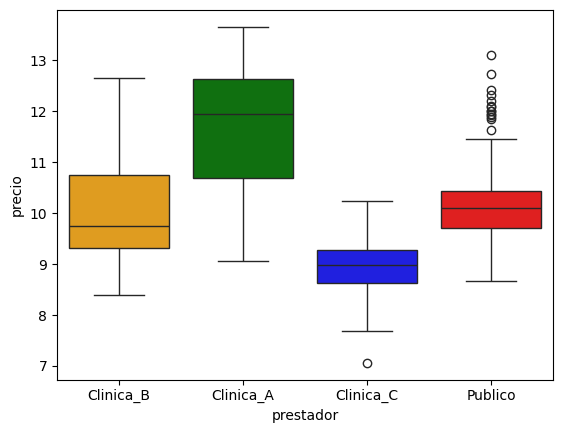

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
palette_colores = {
    "Clinica_A": "green",
    "Clinica_B": "orange",
    "Clinica_C": "blue",
    "Publico": "red"
}

sns.boxplot(x="prestador", y="precio", data=df, palette=palette_colores)
plt.savefig("prestadores_similares.pdf")
plt.show()
files.download("prestadores_similares.pdf")

<ipython-input-16-2900267296>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x="prestador", y="infraestructura", data=df, palette=palette_colores)


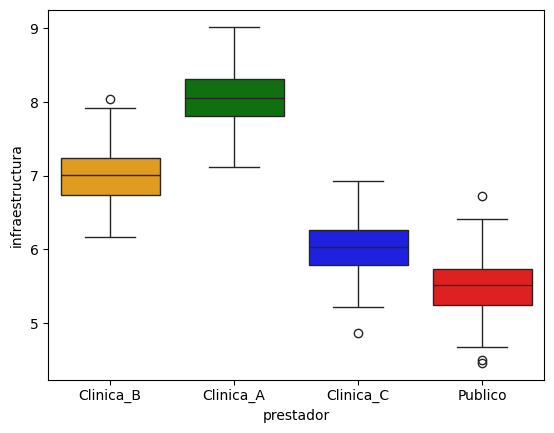

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-16-2900267296>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x="prestador", y="puntaje_doctor", data=df, palette=palette_colores)


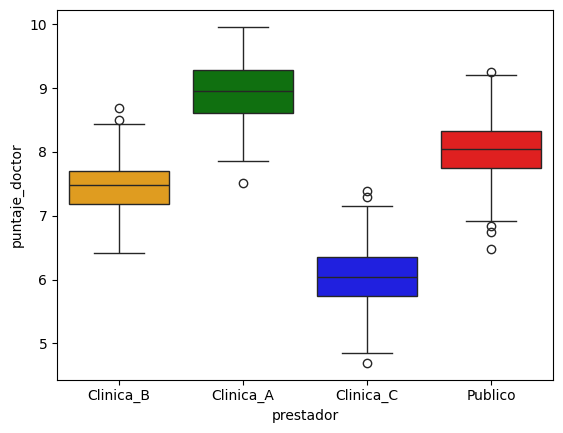

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
#boxplot de Infraestructura
sns.boxplot( x="prestador", y="infraestructura", data=df, palette=palette_colores)
plt.savefig("prestadores_similares_infra.pdf")
plt.show()
files.download("prestadores_similares_infra.pdf")

#boxplot de Puntaje del Doctor
sns.boxplot( x="prestador", y="puntaje_doctor", data=df, palette=palette_colores)
plt.savefig("prestadores_similares_doc.pdf")
plt.show()
files.download("prestadores_similares_doc.pdf")

Estimación logit
----------------

In [19]:
import statsmodels.api as sm

# Calcular participación por prestador
df["participacion"] = df["num_operados"] / df.groupby("ciudad")["num_operados"].transform("sum")

# Calcular participación opción externa y corregir valores pequeños/negativos
df["participacion_opcion_externa"] = 1 - df.groupby("ciudad")["participacion"].transform("sum")
df["participacion_opcion_externa"] = df["participacion_opcion_externa"].clip(lower=1e-6)

# Calcular utilidad indirecta (delta) usando log-odds
df["delta"] = np.log(df["participacion"]) - np.log(df["participacion_opcion_externa"])

# Variables explicativas: precio, infraestructura, puntaje doctor, cambio tecnológico
X = df[["precio", "infraestructura", "puntaje_doctor", "tecnologia_alta"]]
X = sm.add_constant(X)  # agregar intercepto
y = df["delta"]

# Estimar modelo lineal OLS
modelo_logit = sm.OLS(y, X).fit(cov_type="HC1")

# Mostrar resultados
print(modelo_logit.summary())



                            OLS Regression Results                            
Dep. Variable:                  delta   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1455.
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:10:02   Log-Likelihood:                -1.2125
No. Observations:                 677   AIC:                             12.43
Df Residuals:                     672   BIC:                             35.01
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.9882      0.148     